# Analyze after each EXP

## Tools

mean: 0.0299
max: 0.3095
min: 0.0016
std: 0.07
count: 19
[0.007383934, 0.007282313, 0.011130618, 0.0018522337, 0.0016225381, 0.008369181, 0.0019376676, 0.0019307412, 0.010787683, 0.013008862, 0.068251245, 0.0036412424, 0.0033953437, 0.024954222, 0.026603963, 0.0043260907, 0.051205657, 0.011652675, 0.30954158]


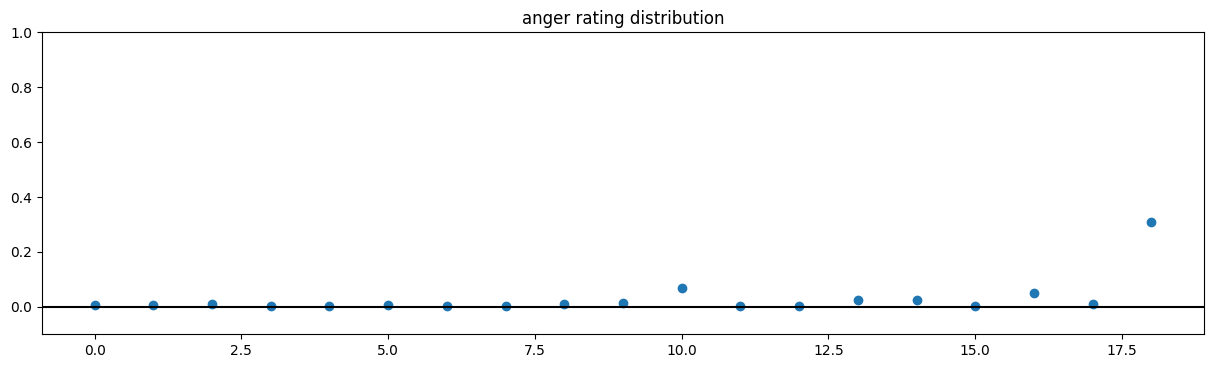

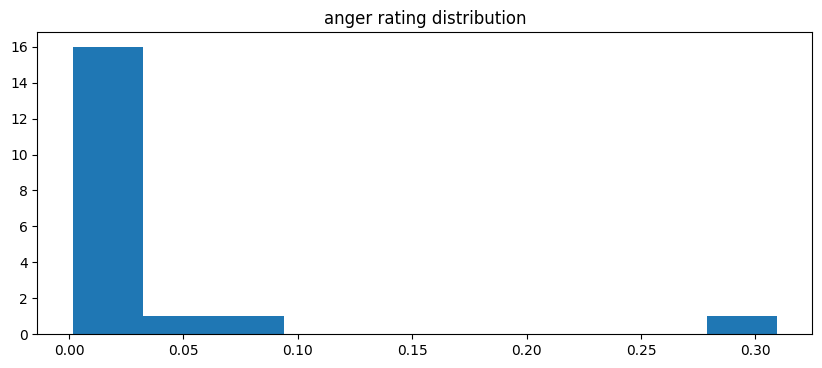

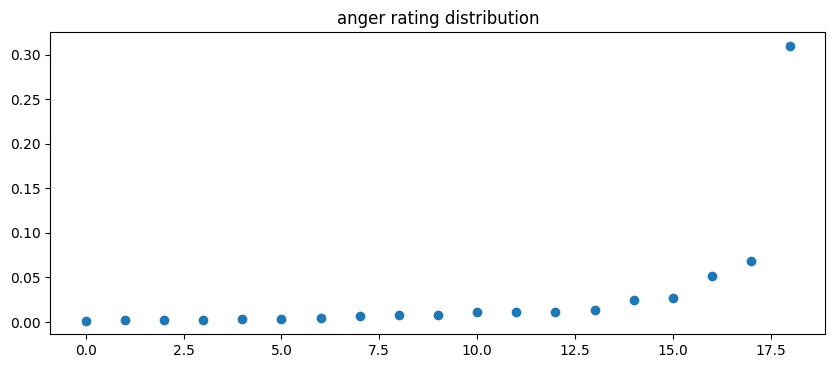

In [3]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_rmn_emotion.csv'
        # csvname = test.split('.png')[0] + '_intensitynet.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp[target_emo]))
    
    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))
    print(res)

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.figure(figsize=(15, 4), dpi=100)
    plt.ylim(-0.1, 1)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the histogram
    plt.figure(figsize=(10, 4), dpi=100)
    plt.hist(res, bins=10)
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.figure(figsize=(10, 4), dpi=100)
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    return res
    


target_emo = 'anger'
fold_name = f'image_analysis/{target_emo}/'
# fold_name = f'image_analysis/241121Exp27-1IntensityOnly/{target_emo}/'
# fold_name = f'image_analysis/241121Exp27Baseline/{target_emo}/'
res = get_rating_dist(fold_name, target_emo)

In [4]:

feat_res = res_feat[:20]
intensity_res = res_inten[:20]
alpha = 0.6
threshold = min(feat_res) +  alpha * (max(feat_res) - min(feat_res))
print('threshold', threshold)

# for i in feat_res:
#     if i > threshold:
#         # print(1)

B_min = min(intensity_res)
B_max = max(intensity_res)

print('bminmax', B_min, B_max)

def calculate_output_nonlinear(A, B, threshold=0.75, alpha=0.8, B_min=0.39, B_max=0.64, output_min=0.75, output_max=1.2, k=10):
    # Clamp B within its defined range
    B = max(B_min, min(B, B_max))
    
    # Scale B to the desired output range [output_min, output_max]
    B_mapped = output_min + (B - B_min) * (output_max - output_min) / (B_max - B_min)
    
    # Apply sigmoid-based weight for smooth transition
    weight = 1 / (1 + np.exp(-k * (A - threshold)))
    print('weight', weight)
    
    # Ensure continuity: blend A and scaled B_mapped smoothly
    if A <= threshold:
        # Below threshold, use A directly
        output = A
    else:
        # Above threshold, calculate the smooth nonlinear mixed output
        output = weight * (alpha * B_mapped + (1 - alpha) * A) + (1 - weight) * A
        print('outputA', alpha * B_mapped + (1 - alpha) * A)
        print('outputB', (1 - weight) * A)
    
    return output

for i, j in enumerate(res_feat[20:]):
    # print(j)
    if j > threshold:
        print('bigger')
        print(j, res_inten[20:][i])
        print('calculation:', calculate_output_nonlinear(j, res_inten[20:][i] + 0.1, threshold=threshold, alpha=0.6, B_min=B_min, B_max=B_max, output_min=threshold, output_max=1.1, k=10))

NameError: name 'res_feat' is not defined

In [ ]:
# Example list
my_list = sorted(list(df['mixed_res']))
# print(list(my_list['mixed_res']))
# Calculate the index for the first 75% of the list
cutoff_index = int(len(my_list) * 0.6)

# Get the first 75% of the list
first_75_percent = my_list[cutoff_index]
print(my_list)
print("First 75% of the list:", first_75_percent)
threshold  = min(my_list) +  alpha * (max(my_list) - min(my_list))
print("threshold:", threshold)

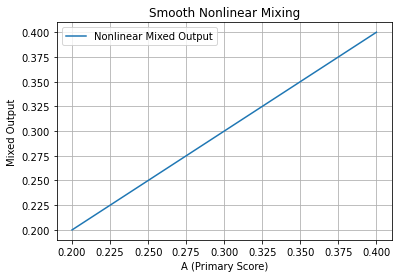

In [75]:
import matplotlib.pyplot as plt
import numpy as np
# Test data
A_values = np.linspace(0.2, 0.4, 100)  # Simulating A in range
B_values = np.linspace(0.3, 0.4, 100)  # Simulating B in range


def calculate_output_nonlinear(A, B, threshold=0.75, alpha=0.8, B_min=0.39, B_max=0.64, output_min=0.75, output_max=1.2, k=10):
    # Clamp B within its defined range
    B = max(B_min, min(B, B_max))
    
    # Scale B to the desired output range [output_min, output_max]
    B_mapped = output_min + (B - B_min) * (output_max - output_min) / (B_max - B_min)
    
    # Apply sigmoid-based weight for smooth transition
    weight = 1 / (1 + np.exp(-k * (A - threshold)))
    
    # Ensure continuity: blend A and scaled B_mapped smoothly
    if A <= threshold:
        # Below threshold, use A directly
        output = A
    else:
        # Above threshold, calculate the smooth nonlinear mixed output
        output = weight * (alpha * B_mapped + (1 - alpha) * A) + (1 - weight) * A
    
    return output

# Calculate outputs
outputs = [calculate_output_nonlinear(A, B) for A, B in zip(A_values, B_values)]

# Plot
plt.plot(A_values, outputs, label="Nonlinear Mixed Output")
plt.xlabel("A (Primary Score)")
plt.ylabel("Mixed Output")
plt.title("Smooth Nonlinear Mixing")
plt.legend()
plt.grid()
plt.show()

In [44]:
import math

def top_30_percent_cutoff(values):
    sorted_values = sorted(values, reverse=True)  # Step 1
    print(sorted_values)
    cutoff_index = math.ceil(len(sorted_values) * 0.3) - 1  # Step 2
    print(cutoff_index)
    return sorted_values[cutoff_index]  # Step 3

# Example usage
cutoff_point = top_30_percent_cutoff(res)
print("Top 30% cutoff point:", cutoff_point)

[0.24400847, 0.23792416, 0.230218, 0.2280163, 0.2068166, 0.20592625, 0.20458142, 0.20172659, 0.19330762, 0.18676615, 0.17539865, 0.17449068, 0.16941668, 0.16940036, 0.1617635, 0.14651753, 0.14034697, 0.13665226, 0.119257055, 0.11854964, 0.116381384, 0.11356946, 0.10939286, 0.10926205, 0.10183896, 0.09865196, 0.08451181, 0.07938875, 0.0659447, 0.063050084, 0.055029724, 0.0501, 0.048309255, 0.042774174, 0.03637099, 0.033074714, 0.032927573, 0.032410722, 0.029762575, 0.027936418, 0.027746577, 0.02666695, 0.025774017, 0.024756063, 0.024528343, 0.02367471, 0.022301486, 0.021320814, 0.01801534, 0.017862465, 0.016514579, 0.016459117, 0.015032929, 0.014143965, 0.013795791, 0.013326133, 0.013315441, 0.013203748, 0.012639929, 0.009901712, 0.00857559, 0.008496433, 0.007911847, 0.007904693, 0.007788889, 0.007199678, 0.0069205402, 0.0068508233, 0.0061950264, 0.006180937, 0.006175741, 0.0061491616, 0.0058911107, 0.0057238843, 0.0055962014, 0.0047615995, 0.0042503653, 0.0035961114, 0.0034432577, 0.00

## 1. rating distribution, basic info, axis distribution, etc

['2024_11_30_16_27_53_fear_1.png', '2024_11_30_16_27_56_fear_2.png', '2024_11_30_16_27_59_fear_3.png', '2024_11_30_16_28_02_fear_4.png', '2024_11_30_16_28_04_fear_5.png', '2024_11_30_16_28_07_fear_6.png', '2024_11_30_16_28_10_fear_7.png', '2024_11_30_16_28_13_fear_8.png', '2024_11_30_16_28_16_fear_9.png', '2024_11_30_16_28_19_fear_10.png']
mean: 0.1518
max: 0.98
min: 0.0016
std: 0.1604
count: 100


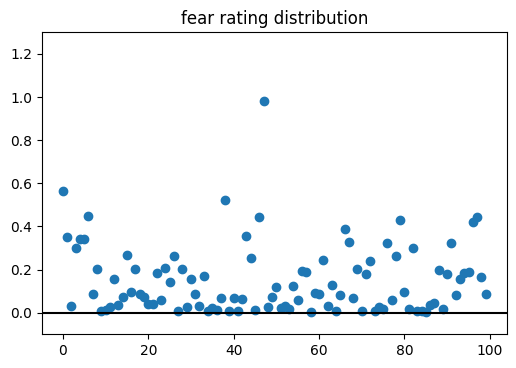

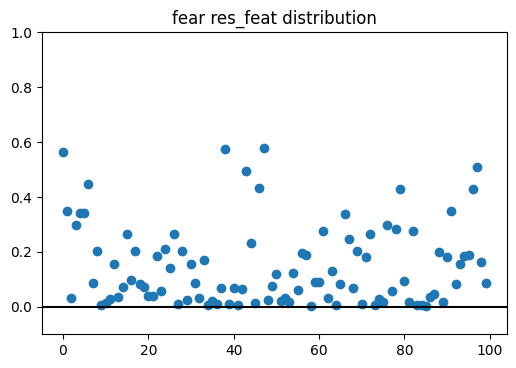

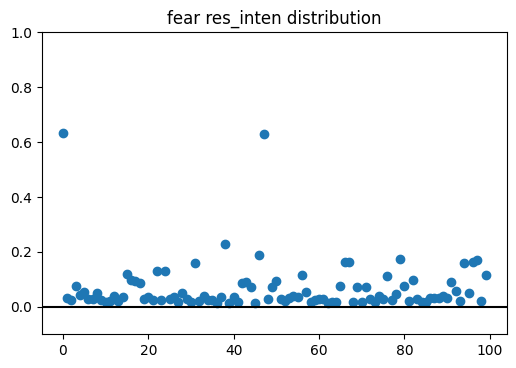

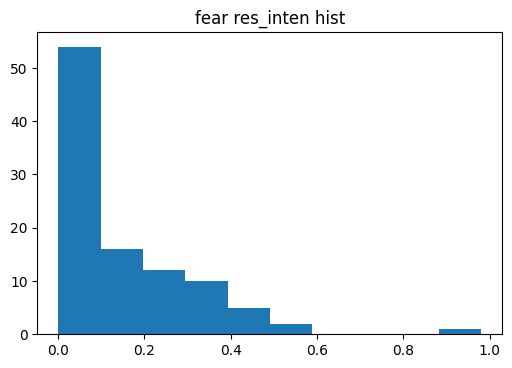

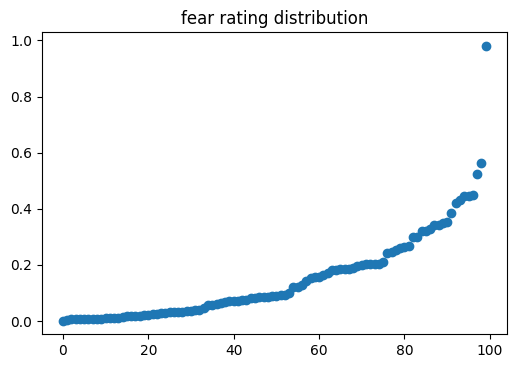

In [21]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(fold_name) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('.png')[0].split('_')[-1]))
    print(images[:10])
    res = []
    res_feat = []
    res_inten = []
    for img in images:
        # print(img)
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp['rating']))
        res_feat.append(float(tmp['feat']))
        res_inten.append(float(tmp['inten']))
        # print(float(tmp['rating']), float(tmp['feat']))

    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.figure(figsize=(6, 4), dpi=100)
    plt.ylim(-0.1, 1.3)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    plt.figure(figsize=(6, 4), dpi=100)
    plt.ylim(-0.1, 1)
    plt.scatter(range(len(res_feat)), res_feat)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' res_feat distribution')
    plt.show()
    
    plt.figure(figsize=(6, 4), dpi=100)
    plt.ylim(-0.1, 1)
    plt.scatter(range(len(res_inten)), res_inten)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' res_inten distribution')
    plt.show()

    # draw the histogram
    plt.figure(figsize=(6, 4), dpi=100)
    plt.hist(res, bins=10)
    plt.title(target_emo + ' res_inten hist')
    plt.show()

    # draw the scatter plot in sorted order
    sorted_res = sorted(res)
    plt.figure(figsize=(6, 4), dpi=100)
    plt.scatter(range(len(sorted_res)), sorted_res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    return res, res_feat, res_inten

target_emo = 'fear'
# fold_name = f'image_analysis/241121Exp28Mixed_v1/{target_emo}_v1'
fold_name = f'image_analysis/{target_emo}'
res, res_feat, res_inten = get_rating_dist(fold_name, target_emo)


In [158]:
# check the mixed_res.csv
import pandas as pd
df = pd.read_csv(os.path.join(fold_name, 'mixed_res.csv'))
print(len(df['mixed_res']))

118


## 2 axis distribution

(100, 15)      rating      feat     inten         x1         x10         x11  \
0  0.032668  0.032668  0.020674  50.332043  202.551766  196.275729   
1  0.208930  0.208930  0.132285  30.363705   44.234199  208.767262   
2  0.094253  0.094253  0.077642  82.271502   31.842663  244.971770   
3  0.184587  0.184587  0.132017  15.366180  110.499502  223.170051   
4  0.071323  0.071323  0.035699  17.119015   18.560812  148.287763   

          x16         x18         x20         x28         x29         x30  \
0  193.054293   68.325440   76.198614   77.266480   28.220569   46.734135   
1  103.947654 -119.349623  172.401287  215.504834   89.133925    7.867526   
2   15.118287  -57.434585  219.005025  160.709077  140.969519   37.292386   
3  231.914509  -20.145113  237.311416   58.248524   17.984576  194.871075   
4  222.970309   89.667563    0.064806   57.914988   46.883205  163.843227   

         x32          x6          x8  
0  16.287092  158.283428  190.454109  
1  56.795135    6.092291 -20

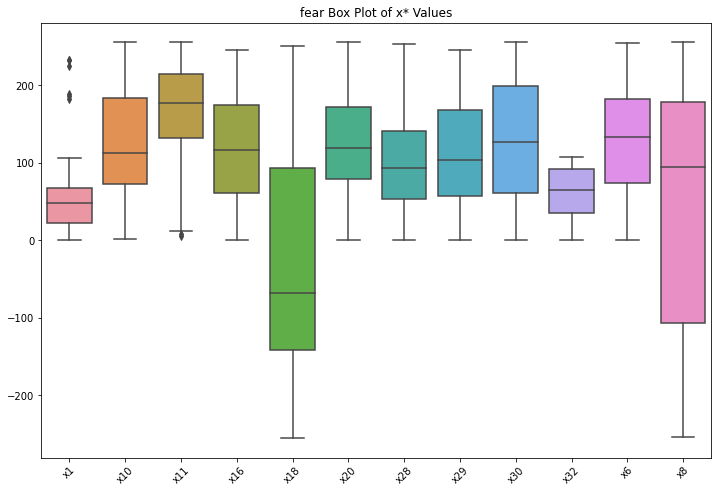

In [23]:
# axis distribution

def get_axis_dist_figure(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name)) if 'png' in x]
    aggregated_data = pd.DataFrame()
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        aggregated_data = pd.concat([aggregated_data, tmp], ignore_index=True)

    # Verify the aggregation by checking the shape and first few rows
    print(aggregated_data.shape, aggregated_data.head())

    # draw the box plot with scatter plot
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=aggregated_data.drop(columns=['rating', 'feat', 'inten']))
#     sns.swarmplot(data=aggregated_data.drop(columns='rating'), color='green')blue
    plt.xticks(rotation=45)
    plt.title(f"{target_emo} Box Plot of x* Values")
    plt.savefig(os.path.join(fold_name, f'{target_emo}_boxplot.jpg'), dpi=300, bbox_inches='tight')
    # plt.show()

get_axis_dist_figure(fold_name, target_emo)

## 2. different rating distributions

In [ ]:
# 

## 3. visualize figures by ratings order

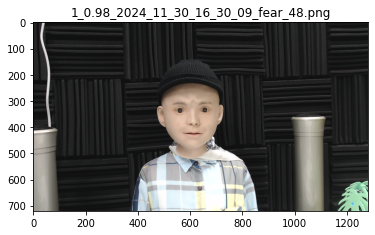

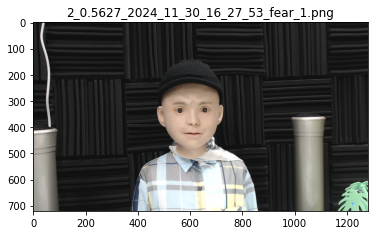

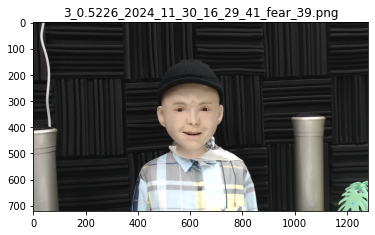

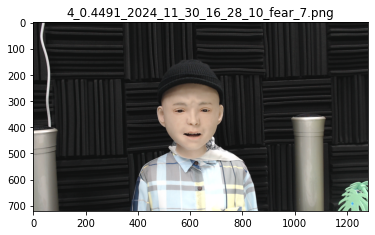

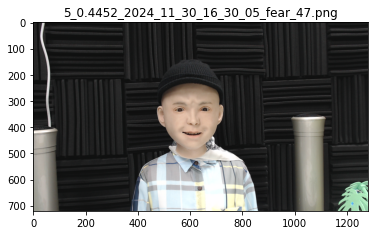

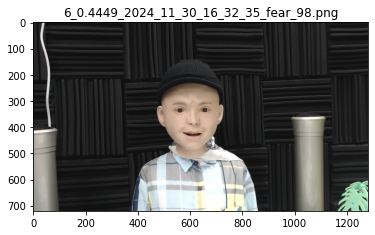

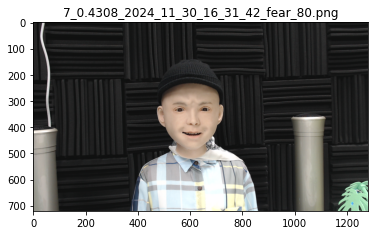

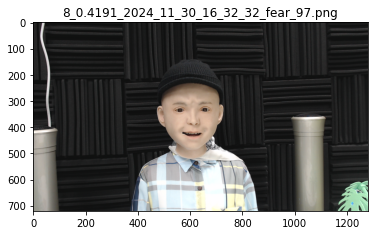

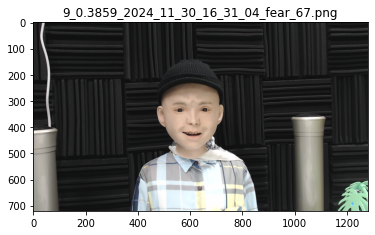

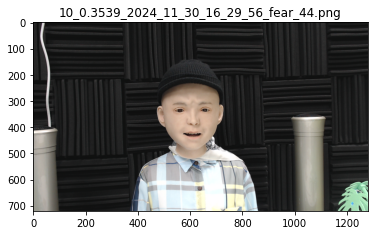

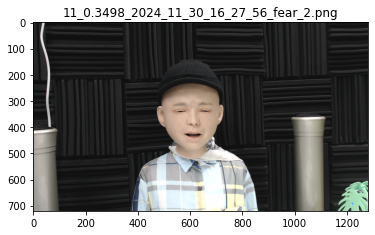

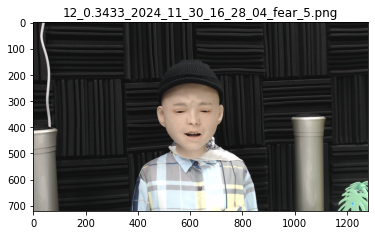

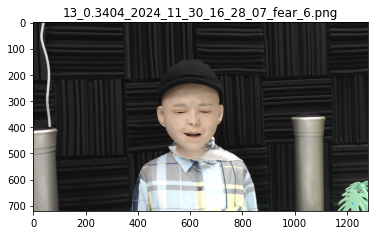

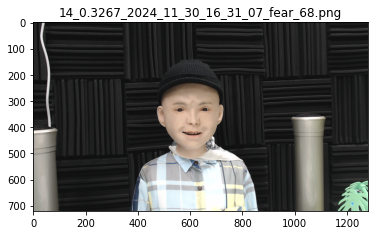

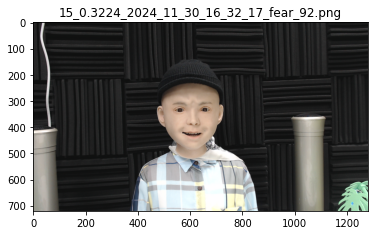

In [22]:
import shutil
def get_png_rating_pairs(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp['rating']))
    return list(zip(images, res))

# put the top 30 images in a subfolder with the ranking in the filename

def move_top_images(fold_name, target_emo, top_n):
    test = get_png_rating_pairs(fold_name, target_emo)
    test = sorted(test, key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        # check if the sub folder exists
        if not os.path.exists(os.path.join(fold_name, 'top_images')):
            os.makedirs(os.path.join(fold_name, 'top_images'))
        # copy to the sub folder named top_images
        shutil.copy(os.path.join(fold_name, test[i][0]), os.path.join(fold_name, 'top_images', str(i + 1) + '_' + str(round(test[i][1], 4)) + '_' + test[i][0]))
    return None

def show_images_in_subfolder(fold_name, target_emo):
    import matplotlib.pyplot as plt
    images = [x for x in os.listdir(os.path.join(fold_name, 'top_images')) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('_')[0]))
    for img in images:
        plt.imshow(plt.imread(os.path.join(fold_name, 'top_images', img)))
        plt.title(img)
        plt.show()

# usage
sorted_pairs = sorted(get_png_rating_pairs(fold_name, target_emo), key=lambda x: x[1], reverse=True)
move_top_images(fold_name, target_emo, 15)
show_images_in_subfolder(fold_name, target_emo)

## 4. Analyze the ratings for human judged probe images and the top ratings

In [11]:
print(fold_name)

image_analysis/anger


In [14]:

filename_order_pairs = get_png_rating_pairs(fold_name, target_emo)
filename_order_pairs = sorted(filename_order_pairs, key=lambda x:int(x[0].split('.png')[0].split('_')[-1]))
# filename_order_pairs.reverse()
print(filename_order_pairs)

# probe should be the first ** files



[('2024_11_21_10_22_01_anger_1.png', 0.0024908308), ('2024_11_21_10_22_05_anger_2.png', 0.0013266978), ('2024_11_21_10_22_08_anger_3.png', 0.08295883), ('2024_11_21_10_22_11_anger_4.png', 0.08535274), ('2024_11_21_10_22_14_anger_5.png', 0.0027993268), ('2024_11_21_10_22_17_anger_6.png', 0.018634763), ('2024_11_21_10_22_21_anger_7.png', 0.012612821), ('2024_11_21_10_22_24_anger_8.png', 0.15443212), ('2024_11_21_10_22_27_anger_9.png', 0.012157859), ('2024_11_21_10_22_30_anger_10.png', 0.61066526), ('2024_11_21_10_22_34_anger_11.png', 0.18266271), ('2024_11_21_10_22_37_anger_12.png', 0.16978692), ('2024_11_21_10_22_40_anger_13.png', 0.28506508), ('2024_11_21_10_22_43_anger_14.png', 0.215658), ('2024_11_21_10_22_47_anger_15.png', 0.32172003), ('2024_11_21_10_22_50_anger_16.png', 0.47901842), ('2024_11_21_10_22_53_anger_17.png', 0.22535469), ('2024_11_21_10_22_56_anger_18.png', 0.13944066), ('2024_11_21_10_23_00_anger_19.png', 0.49344957), ('2024_11_21_10_23_04_anger_20.png', 0.002294534), 

In [31]:
filename_order_pairs

[('2024_11_13_15_40_45_disgust_2.png', 0.039546266),
 ('2024_11_13_15_40_42_disgust_1.png', 0.37437734),
 ('2024_11_13_15_40_38_disgust_0.png', 0.00026482125)]

## 5. Visualize the intensitynet order

mean: 0.4897
max: 0.6511
min: 0.3149
std: 0.0609
count: 300


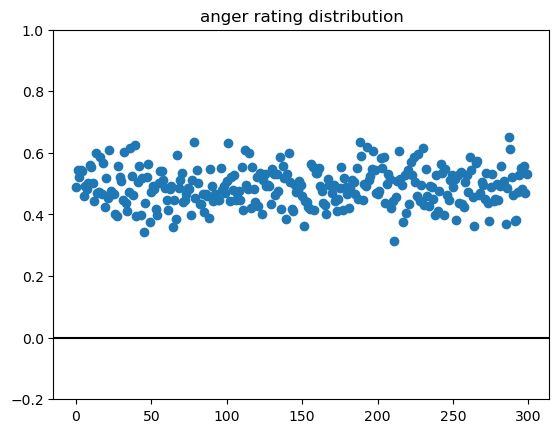

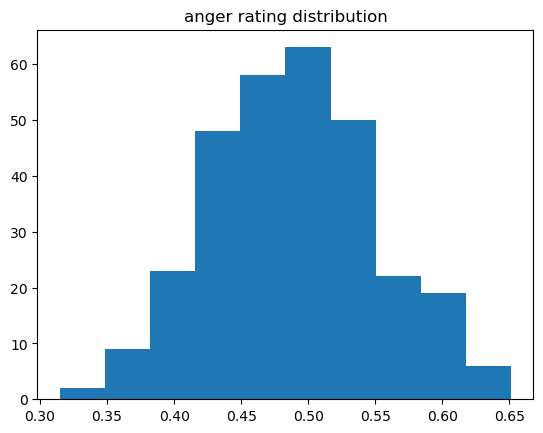

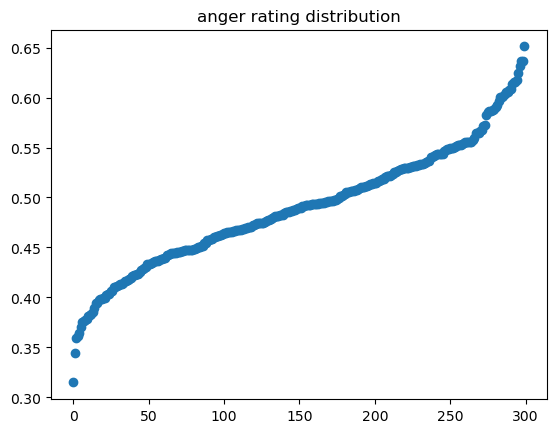

In [20]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_intensitynet.csv'
        tmp = pd.read_csv(csvname)
#         res.append(float(tmp[target_emo]))
        res.append(float(tmp['angry']))

    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.ylim(-0.2, 1)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the histogram
    plt.hist(res, bins=10)
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    

fold_name = 'image_analysis/241114Exp25/new_baseline'
target_emo = 'anger'
get_rating_dist(fold_name, target_emo)

## 6. visualize figures by ratings order

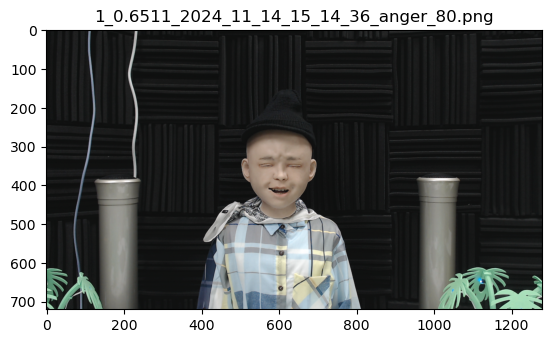

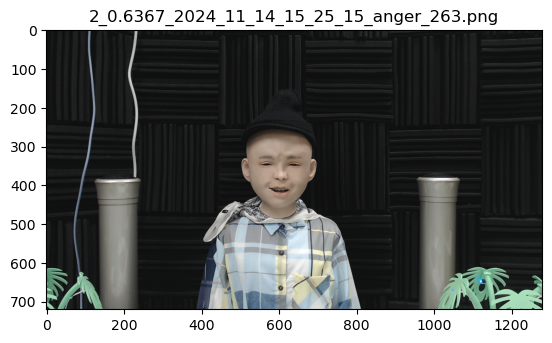

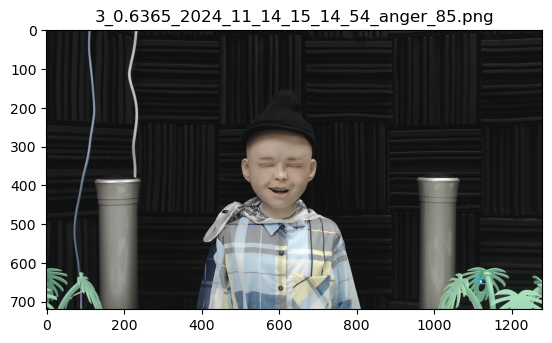

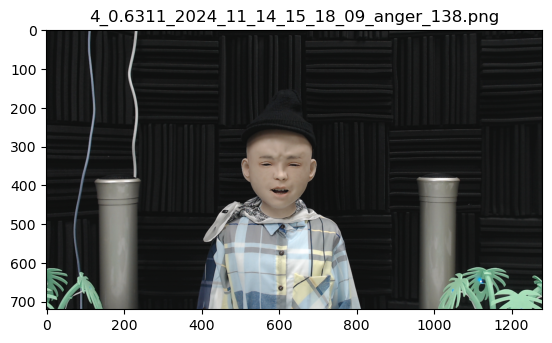

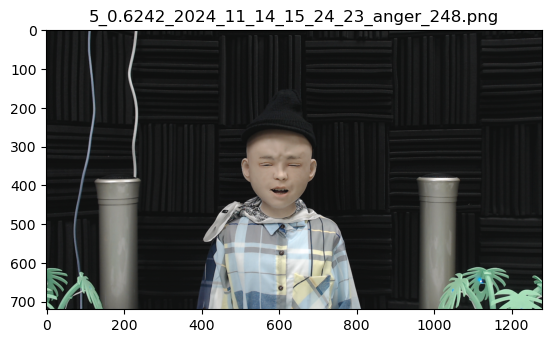

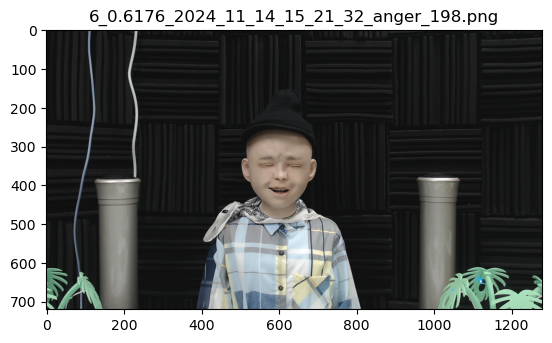

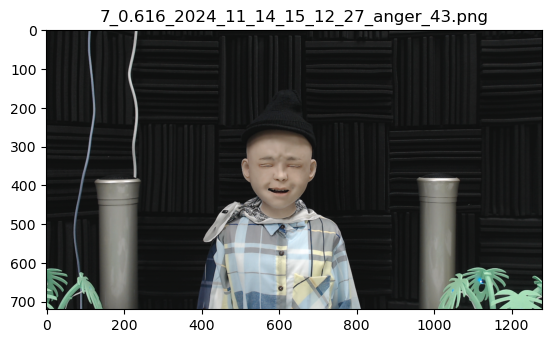

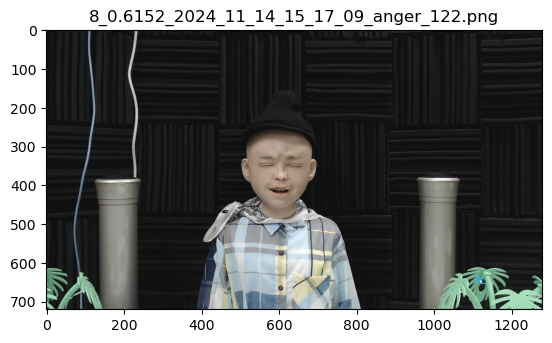

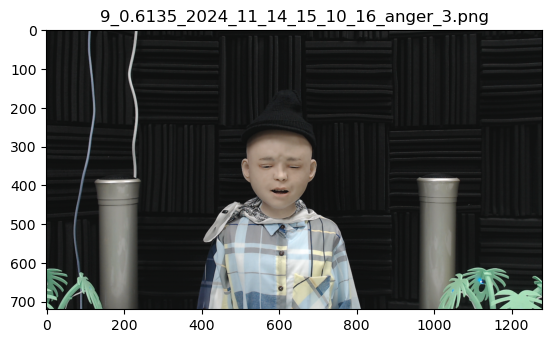

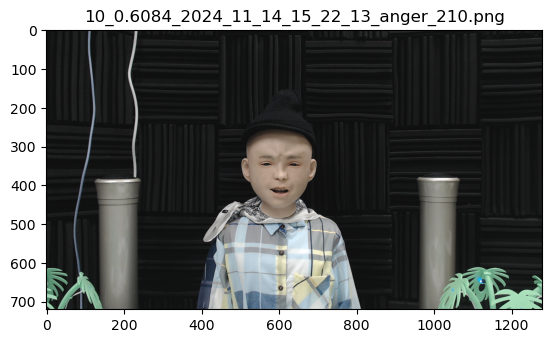

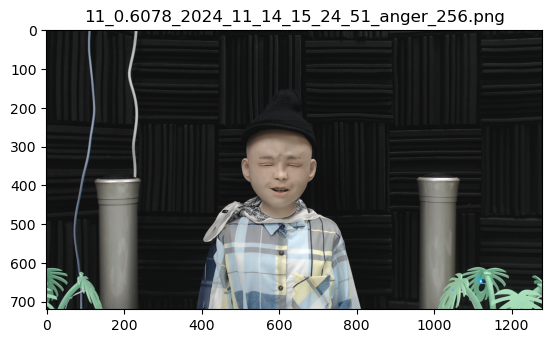

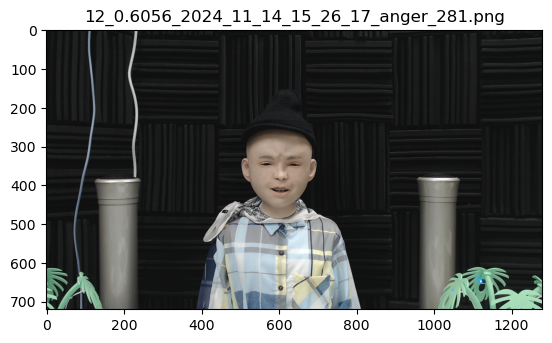

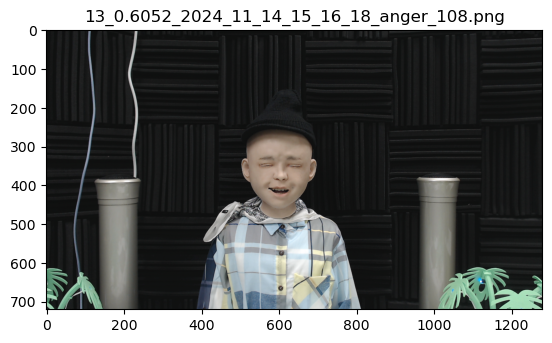

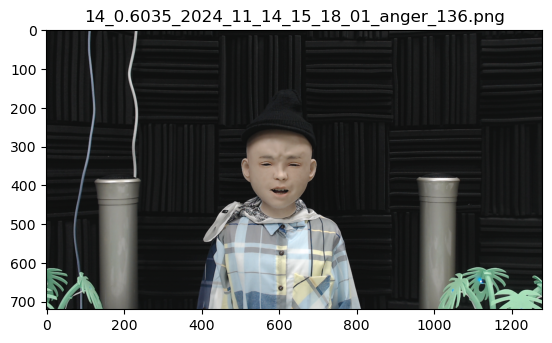

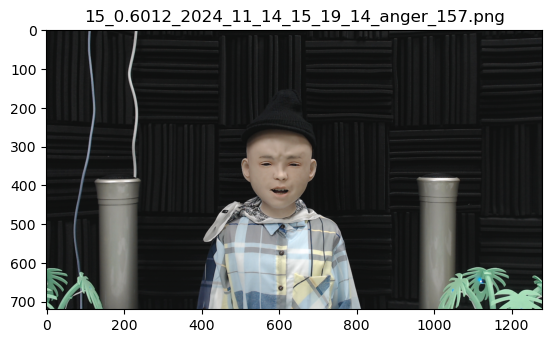

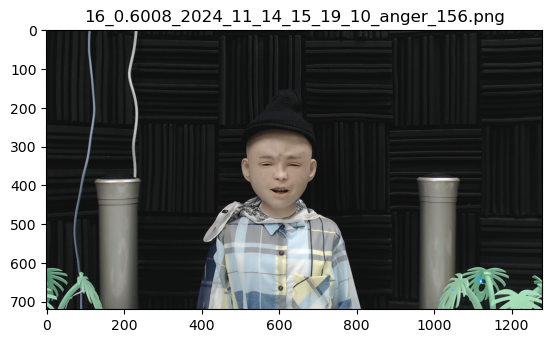

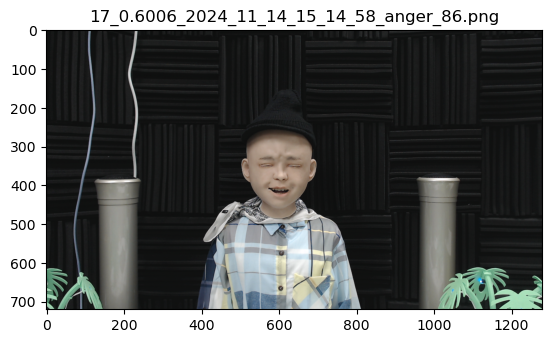

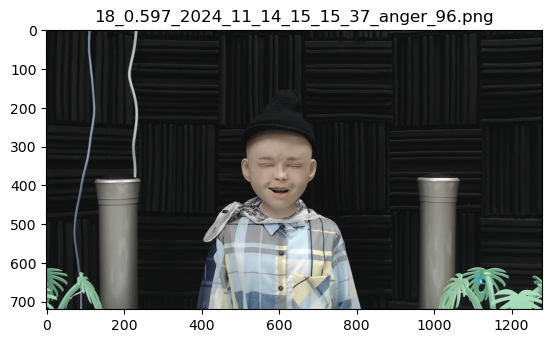

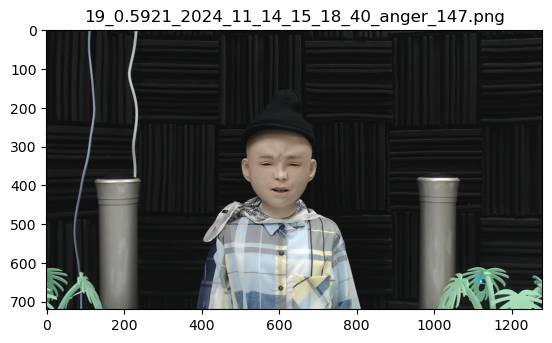

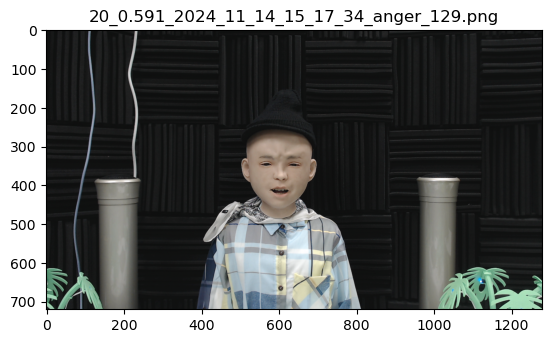

In [24]:
import shutil
def get_png_rating_pairs(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_intensitynet.csv'
        tmp = pd.read_csv(csvname)
#         res.append(float(tmp[target_emo]))
        res.append(float(tmp['angry']))
    return list(zip(images, res))

# put the top 30 images in a subfolder with the ranking in the filename

def move_top_images(fold_name, target_emo, top_n):
    test = get_png_rating_pairs(fold_name, target_emo)
    test = sorted(test, key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        # check if the sub folder exists
        if not os.path.exists(os.path.join(fold_name, target_emo, 'top_images_inten')):
            os.makedirs(os.path.join(fold_name, target_emo, 'top_images_inten'))
        # copy to the sub folder named top_images
        shutil.copy(os.path.join(fold_name, target_emo, test[i][0]), os.path.join(fold_name, target_emo, 'top_images_inten', str(i + 1) + '_' + str(round(test[i][1], 4)) + '_' + test[i][0]))
    return None

def show_images_in_subfolder(fold_name, target_emo):
    import matplotlib.pyplot as plt
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo, 'top_images_inten')) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('_')[0]))
    for img in images:
        plt.imshow(plt.imread(os.path.join(fold_name, target_emo, 'top_images_inten', img)))
        plt.title(img)
        plt.show()

# usage
sorted_pairs = sorted(get_png_rating_pairs(fold_name, target_emo), key=lambda x: x[1], reverse=True)
move_top_images(fold_name, target_emo, 20)
show_images_in_subfolder(fold_name, target_emo)

In [12]:
# load log and analyze
import pandas as pd
import json

# Load the JSON file
data = pd.read_json('image_analysis/anger/baye_logs.json', lines=True)

# Display the first few rows
print(data.head())

negative_indices = data[data['target'] < 0].index.tolist()
negative_indices


     target                                             params  \
0  0.013234  {'x1': 141.4699283283842, 'x10': 1.61147456520...   
1  0.005860  {'x1': 95.64701226922041, 'x10': 151.401416119...   
2  0.046329  {'x1': 88.7744608756346, 'x10': 62.25044060576...   
3  0.022448  {'x1': 245.16173295051672, 'x10': 95.559653090...   
4  0.016686  {'x1': 50.75987051091533, 'x10': 18.5608121146...   

                                            datetime  
0  {'datetime': '2024-11-16 20:53:12', 'elapsed':...  
1  {'datetime': '2024-11-16 20:53:15', 'elapsed':...  
2  {'datetime': '2024-11-16 20:53:18', 'elapsed':...  
3  {'datetime': '2024-11-16 20:53:21', 'elapsed':...  
4  {'datetime': '2024-11-16 20:53:24', 'elapsed':...  


[34, 46]

In [29]:
import numpy as np
def calculate_output_nonlinear(A, B, threshold=0.75, alpha=0.8, B_min=0.39, B_max=0.64, output_min=0.75, output_max=1.2, k=10):
    # If A is below or equal to the threshold, output A directly
    if A <= threshold:
        return A
    
    # Scale B to fit within the desired range [output_min, output_max]
    B_mapped = output_min + (B - B_min) * (output_max - output_min) / (B_max - B_min)
    print(B_mapped)
    
    # Apply a sigmoid-based weight for smooth transition
    weight = 1 / (1 + np.exp(-k * (A - threshold)))  # Sigmoid function for smoother blending
    
    # Calculate the smooth nonlinear mixed output
    output = weight * (alpha * B_mapped + (1 - alpha) * A) + (1 - weight) * A
    
    return output

output_feat = 0.15581991
output_inten = 0.0663062584400177
threshold = 0.1

B_max= 0.1813
B_min= 0.0966

output = calculate_output_nonlinear(output_feat, output_inten, threshold=threshold, alpha=0.8, B_min=B_min, B_max=B_max, output_min=threshold, output_max=1.1, k=10)
print(output)

-0.2576592864224595
-0.05457012881275982


In [ ]:
[470.30353, 235.7863, 690.0836, 532.0844, 0.99978167]